In [113]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [14]:
def denoise(img, weight=0.1, eps=1e-3, num_iter_max=200):
    u = np.zeros_like(img)
    px = np.zeros_like(img)
    py = np.zeros_like(img)                 
    nm = np.prod(img.shape[:2])
    tau = 0.125
    i = 0
    while i < num_iter_max:
        u_old = u
        ux = np.roll(u, -1, axis=1) - u
        uy = np.roll(u, -1, axis=0) - u
        px_new = px + (tau / weight) * ux
        py_new = py + (tau / weight) * uy
        norm_new = np.maximum(1, np.sqrt(px_new **2 + py_new ** 2))
        px = px_new / norm_new
        py = py_new / norm_new
        rx = np.roll(px, 1, axis=1)
        ry = np.roll(py, 1, axis=0)
        div_p = (px - rx) + (py - ry)
        u = img + weight * div_p
        error = np.linalg.norm(u - u_old) / np.sqrt(nm)
        if i == 0:
                 err_init = error
                 err_prev = error
        else:
            if np.abs(err_prev - error) < eps * err_init:
                break
            else:
                e_prev = error
        i += 1
    return u

Text(0.5, 1.0, 'Original image')

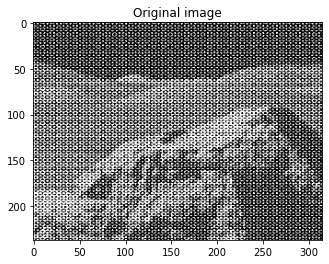

In [101]:
im1 = plt.imread('moonlanding_small.png').astype(float)
plt.figure()
plt.imshow(im1, plt.cm.gray)
plt.title('Original image')

Text(0.5, 1.0, 'Fourier transform')

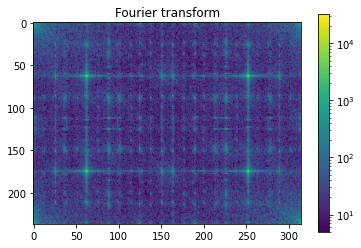

In [102]:
from scipy import fftpack
im_fft = fftpack.fft2(im1)
def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

Text(0.5, 1.0, 'Filtered Spectrum')

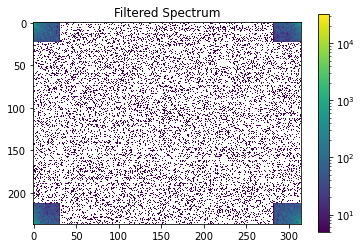

In [103]:
keep_fraction = 0.1
im_fft2 = im_fft.copy()
r, c = im_fft2.shape
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

Text(0.5, 1.0, 'Reconstructed Image')

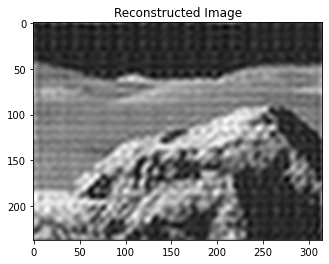

In [104]:
im_new = fftpack.ifft2(im_fft2).real
plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

Text(0.5, 1.0, 'denoising')

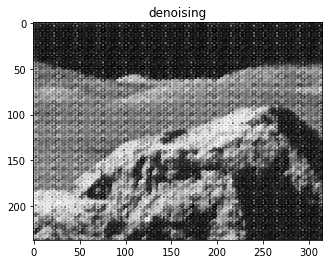

In [105]:
plt.imshow(denoise(im1, weight=0.221),plt.cm.gray)
plt.title('denoising')

<ipython-input-163-ad463d1dd961>:4: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  im=rgb2gray(im)


Text(0.5, 1.0, 'Original image')

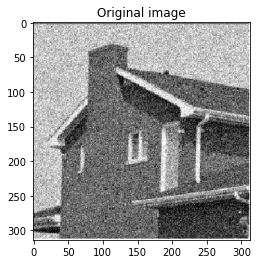

In [163]:
from skimage.io import imread
from skimage.color import rgb2gray
im = plt.imread('m.png')
im=rgb2gray(im)
plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

Text(0.5, 1.0, 'Fourier transform')

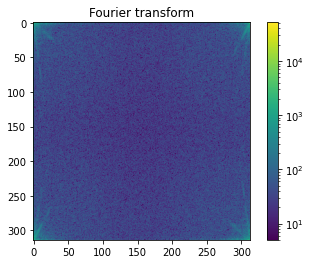

In [164]:
from scipy import fftpack
im_fft = fftpack.fft2(im)
def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()
plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

Text(0.5, 1.0, 'Filtered Spectrum')

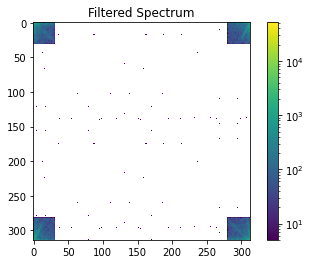

In [165]:
keep_fraction = 0.1
im_fft2 = im_fft.copy()
r, c = im_fft2.shape
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

Text(0.5, 1.0, 'Reconstructed Image')

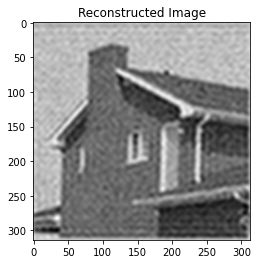

In [166]:
im_new = fftpack.ifft2(im_fft2).real
plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

Text(0.5, 1.0, 'denoising')

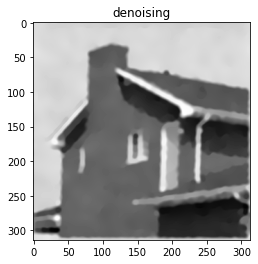

In [171]:
plt.imshow(denoise(im_new, weight=0.14),plt.cm.gray)
plt.title('denoising')

Text(0.5, 1.0, 'Original image')

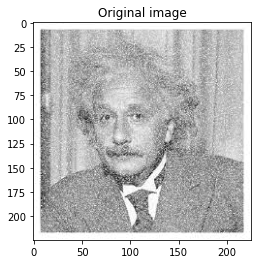

In [180]:
from skimage.io import imread
from skimage.color import rgb2gray
im = plt.imread('ce.jpg')
im=rgb2gray(im)
plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

Text(0.5, 1.0, 'Fourier transform')

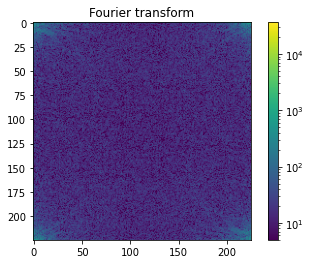

In [181]:
from scipy import fftpack
im_fft = fftpack.fft2(im)
def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()
plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

Text(0.5, 1.0, 'Filtered Spectrum')

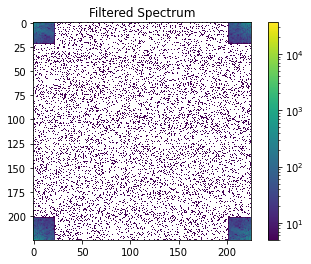

In [182]:
keep_fraction = 0.1
im_fft2 = im_fft.copy()
r, c = im_fft2.shape
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

Text(0.5, 1.0, 'Reconstructed Image')

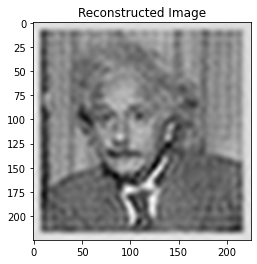

In [183]:
im_new = fftpack.ifft2(im_fft2).real
plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

Text(0.5, 1.0, 'denoising')

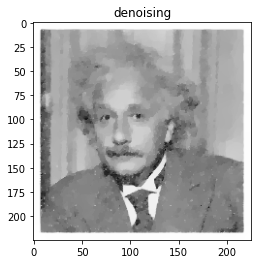

In [194]:
plt.imshow(denoise(im, weight=0.07),plt.cm.gray)
plt.title('denoising')